In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

In [2]:
train = pd.read_csv('data/digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = train.iloc[:,1:]
y = train.iloc[:,0]

In [4]:
train.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
19983,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


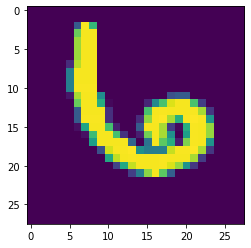

In [5]:
plt.imshow(X.iloc[10993,:].values.reshape(28,28))

In [6]:
X_train,X_val, y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=2) 

In [7]:
y_train.shape

(33600,)

In [8]:
y_train = y_train.values.reshape(-1,1)
y_val = y_val.values.reshape(-1,1)

In [9]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_train = ohe.fit_transform(y_train)
y_val = ohe.transform(y_val)

In [10]:
y_train.shape

(33600, 10)

In [11]:
classifier = Sequential()

In [12]:
classifier.add(Dense(16,activation='relu'))
classifier.add(Dense(16,activation='relu'))
classifier.add(Dense(10,activation='sigmoid'))

In [13]:
classifier.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [14]:
eps = 100
model_run = classifier.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_val,y_val))

Epoch 1/100
840/840 [==============================] - 3s 2ms/step - loss: 2.7994 - accuracy: 0.2055 - val_loss: 1.9502 - val_accuracy: 0.2811
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 1.8176 - accuracy: 0.3192 - val_loss: 1.6452 - val_accuracy: 0.3891
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5075 - accuracy: 0.4275 - val_loss: 1.4363 - val_accuracy: 0.4967
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 1.2797 - accuracy: 0.5033 - val_loss: 1.1272 - val_accuracy: 0.5472
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 0.9854 - accuracy: 0.6532 - val_loss: 0.8404 - val_accuracy: 0.7314
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 0.8006 - accuracy: 0.7443 - val_loss: 0.7384 - val_accuracy: 0.7510
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7174 - accuracy: 0.7782 - val_loss: 0.7212 - val_accuracy: 0.7778

Epoch 58/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2916 - accuracy: 0.9166 - val_loss: 0.3982 - val_accuracy: 0.8885
Epoch 59/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2904 - accuracy: 0.9162 - val_loss: 0.3931 - val_accuracy: 0.8935
Epoch 60/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2870 - accuracy: 0.9170 - val_loss: 0.3872 - val_accuracy: 0.8951
Epoch 61/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2892 - accuracy: 0.9182 - val_loss: 0.3835 - val_accuracy: 0.8900
Epoch 62/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2812 - accuracy: 0.9200 - val_loss: 0.3884 - val_accuracy: 0.8930
Epoch 63/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2857 - accuracy: 0.9186 - val_loss: 0.3695 - val_accuracy: 0.8982
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 0.2820 - accuracy: 0.9193 - val_loss: 0.3897 - val_accuracy:

In [15]:
def plot_accloss(eps,model_run):
    plt.figure(figsize=(15,15))
    epochs = range(1,eps+1)

    plt.subplot(2,1,1)
    train_accuracy = model_run.history['accuracy']
    validation_accuracy = model_run.history['val_accuracy']
    sns.lineplot(epochs, train_accuracy, label ='Training Accuracy')
    sns.lineplot(epochs, validation_accuracy, label ='Validation Accuracy')
    plt.title('Accuracy v/s Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(2,1,2)
    train_loss = model_run.history['loss']
    validation_loss = model_run.history['val_loss']
    sns.lineplot(epochs, train_loss, label ='Training Loss')
    sns.lineplot(epochs, validation_loss, label ='Validation Loss')
    plt.title('Loss v/s Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

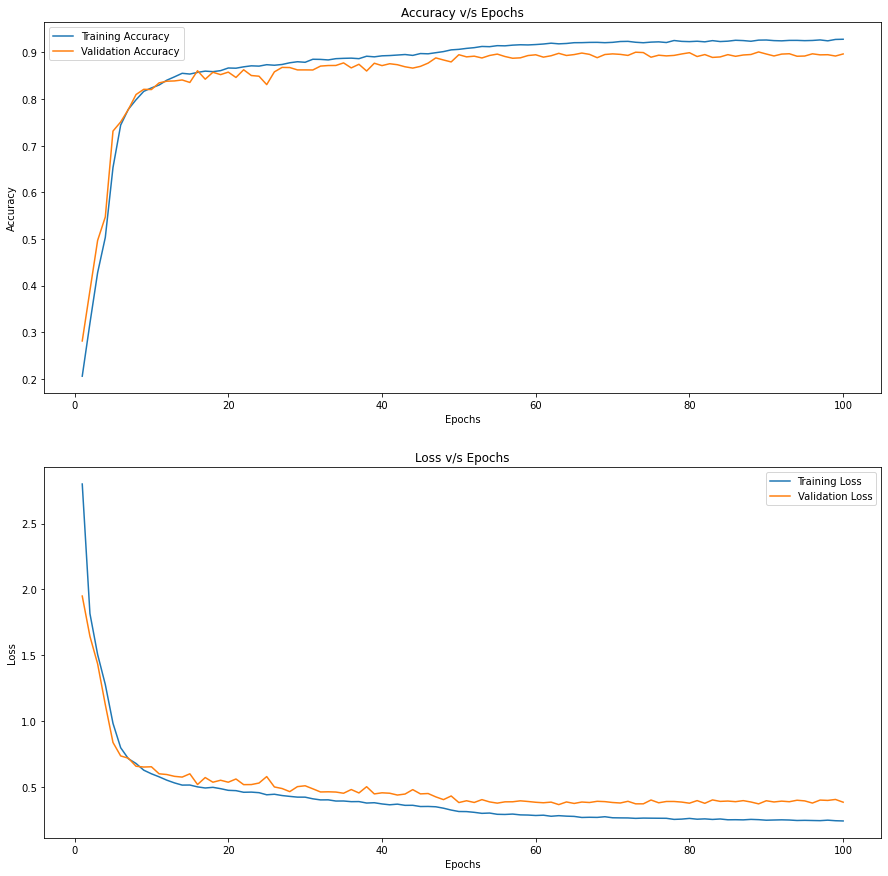

In [16]:
plot_accloss(eps,model_run)

In [34]:
def evaluation(model,X,y):
    evala = model.evaluate(X,y)
    loss = evala[0]
    accuracy = evala[1]
    print('loss = ',np.round(loss,5))
    print('accuracy = ',np.round(accuracy*100,2))

In [35]:
evaluation(classifier,X_val,y_val)

263/263 [==============================] - 1s 2ms/step - loss: 0.4061 - accuracy: 0.8974
loss =  0.40605
accuracy =  89.74


# Zero Weight Initialization

In [18]:
classifier_zero = Sequential()

In [19]:
initializer = tf.keras.initializers.zeros()
classifier_zero.add(Dense(16,activation='relu',kernel_initializer=initializer))
classifier_zero.add(Dense(16,activation='relu'))
classifier_zero.add(Dense(10,activation='sigmoid'))

In [20]:
classifier_zero.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [21]:
model_run2 = classifier_zero.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_val,y_val))

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3019 - accuracy: 0.1086 - val_loss: 2.3016 - val_accuracy: 0.1094
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1094
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1094
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094

Epoch 58/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1094
Epoch 59/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1094
Epoch 60/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3013 - val_accuracy: 0.1094
Epoch 61/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 62/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 63/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

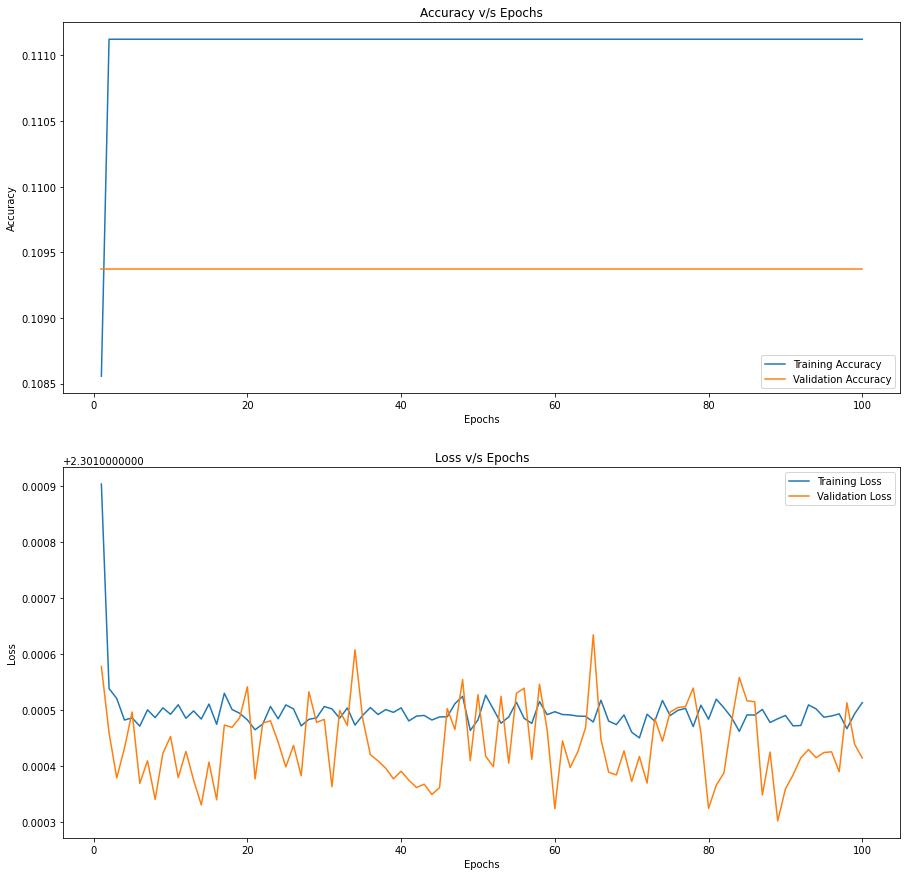

In [22]:
plot_accloss(eps,model_run2)

In [36]:
evaluation(classifier_zero,X_val,y_val)

263/263 [==============================] - 1s 2ms/step - loss: 2.3009 - accuracy: 0.1145
loss =  2.30094
accuracy =  11.45


# Random Normal Initialization

In [23]:
classifier_rand_normal = Sequential()

In [24]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0,stddev=1.0)
classifier_rand_normal.add(Dense(16,activation='relu',kernel_initializer=initializer))
classifier_rand_normal.add(Dense(16,activation='relu'))
classifier_rand_normal.add(Dense(10,activation='sigmoid'))

In [25]:
classifier_rand_normal.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [37]:
model_run3 = classifier_rand_normal.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_val,y_val))

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 167.7890 - accuracy: 0.1695 - val_loss: 3.9767 - val_accuracy: 0.1394
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 2.7910 - accuracy: 0.1262 - val_loss: 2.6508 - val_accuracy: 0.1244
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 2.4023 - accuracy: 0.1208 - val_loss: 2.4505 - val_accuracy: 0.1213
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3203 - accuracy: 0.1225 - val_loss: 2.3508 - val_accuracy: 0.1393
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 2.2669 - accuracy: 0.1368 - val_loss: 2.2695 - val_accuracy: 0.1540
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 2.2123 - accuracy: 0.1600 - val_loss: 2.1885 - val_accuracy: 0.1702
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 2.1687 - accuracy: 0.1733 - val_loss: 2.1711 - val_accuracy: 0.17

Epoch 58/100
840/840 [==============================] - 2s 2ms/step - loss: 0.9744 - accuracy: 0.5987 - val_loss: 1.0925 - val_accuracy: 0.6003
Epoch 59/100
840/840 [==============================] - 2s 2ms/step - loss: 0.9628 - accuracy: 0.6062 - val_loss: 1.0972 - val_accuracy: 0.6039
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 0.9572 - accuracy: 0.6145 - val_loss: 1.0626 - val_accuracy: 0.6195
Epoch 61/100
840/840 [==============================] - 1s 1ms/step - loss: 0.9418 - accuracy: 0.6194 - val_loss: 1.0810 - val_accuracy: 0.6129
Epoch 62/100
840/840 [==============================] - 1s 1ms/step - loss: 0.9348 - accuracy: 0.6178 - val_loss: 1.0469 - val_accuracy: 0.6290
Epoch 63/100
840/840 [==============================] - 1s 1ms/step - loss: 0.9241 - accuracy: 0.6258 - val_loss: 1.0658 - val_accuracy: 0.6284
Epoch 64/100
840/840 [==============================] - 1s 1ms/step - loss: 0.9185 - accuracy: 0.6321 - val_loss: 1.0729 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

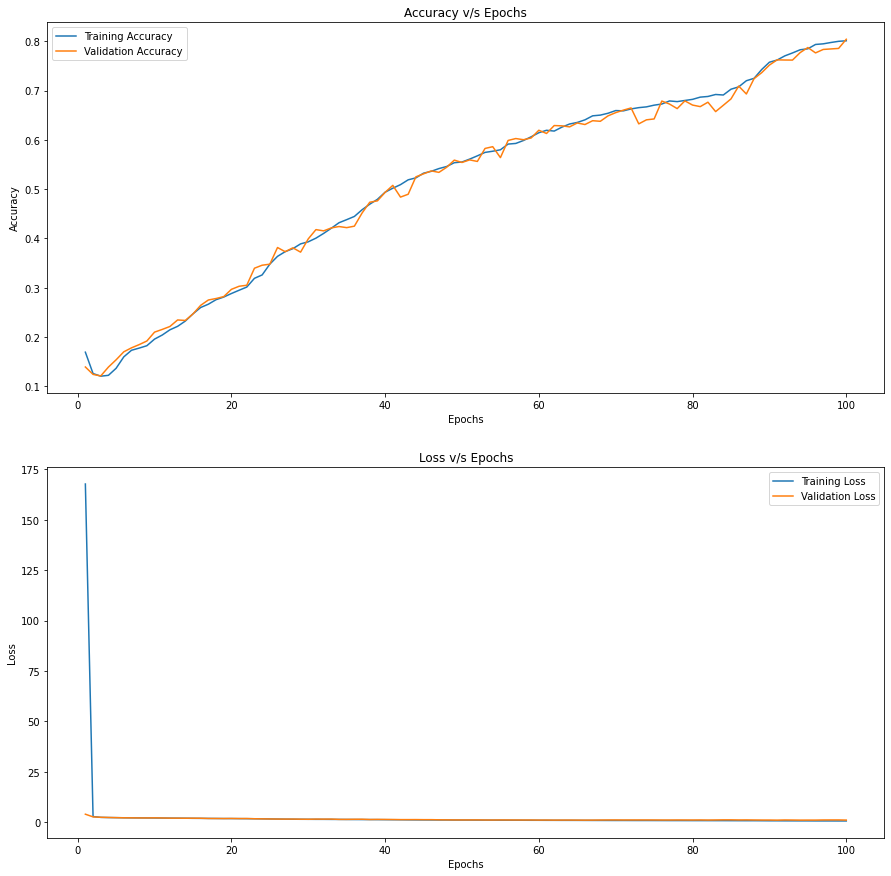

In [38]:
plot_accloss(eps,model_run3)

In [39]:
evaluation(classifier_rand_normal,X_val,y_val)

263/263 [==============================] - 1s 2ms/step - loss: 1.1036 - accuracy: 0.7988
loss =  1.10356
accuracy =  79.88


# Glorot Weight Initialization

 * mean = 0
 * stddev = sqrt(2 / (fan_in + fan_out))  where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor.

In [40]:
classifier_glorot = Sequential()

In [41]:
initializer = tf.keras.initializers.GlorotNormal()
classifier_glorot.add(Dense(16,activation='relu',kernel_initializer=initializer))
classifier_glorot.add(Dense(16,activation='relu'))
classifier_glorot.add(Dense(10,activation='sigmoid'))

In [42]:
classifier_glorot.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [43]:
model_run4 = classifier_glorot.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_val,y_val))

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 3.4683 - accuracy: 0.4214 - val_loss: 1.3836 - val_accuracy: 0.5312
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 1.2161 - accuracy: 0.5605 - val_loss: 1.0695 - val_accuracy: 0.6231
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 1.0072 - accuracy: 0.6326 - val_loss: 0.9064 - val_accuracy: 0.7016
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 0.8751 - accuracy: 0.7085 - val_loss: 0.8463 - val_accuracy: 0.7168
Epoch 5/100
840/840 [==============================] - 2s 2ms/step - loss: 0.7826 - accuracy: 0.7507 - val_loss: 0.7500 - val_accuracy: 0.7696
Epoch 6/100
840/840 [==============================] - 2s 2ms/step - loss: 0.7373 - accuracy: 0.7666 - val_loss: 0.6923 - val_accuracy: 0.7894
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6828 - accuracy: 0.7823 - val_loss: 0.6814 - val_accuracy: 0.7930

Epoch 58/100
840/840 [==============================] - 2s 3ms/step - loss: 0.3209 - accuracy: 0.9047 - val_loss: 0.4584 - val_accuracy: 0.8749
Epoch 59/100
840/840 [==============================] - 2s 2ms/step - loss: 0.3232 - accuracy: 0.9036 - val_loss: 0.4259 - val_accuracy: 0.8832
Epoch 60/100
840/840 [==============================] - 1s 1ms/step - loss: 0.3188 - accuracy: 0.9042 - val_loss: 0.4724 - val_accuracy: 0.8702
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 0.3180 - accuracy: 0.9057 - val_loss: 0.4441 - val_accuracy: 0.8827
Epoch 62/100
840/840 [==============================] - 2s 3ms/step - loss: 0.3145 - accuracy: 0.9058 - val_loss: 0.4221 - val_accuracy: 0.8854
Epoch 63/100
840/840 [==============================] - 3s 3ms/step - loss: 0.3186 - accuracy: 0.9048 - val_loss: 0.4463 - val_accuracy: 0.8810
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 0.3130 - accuracy: 0.9063 - val_loss: 0.4345 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

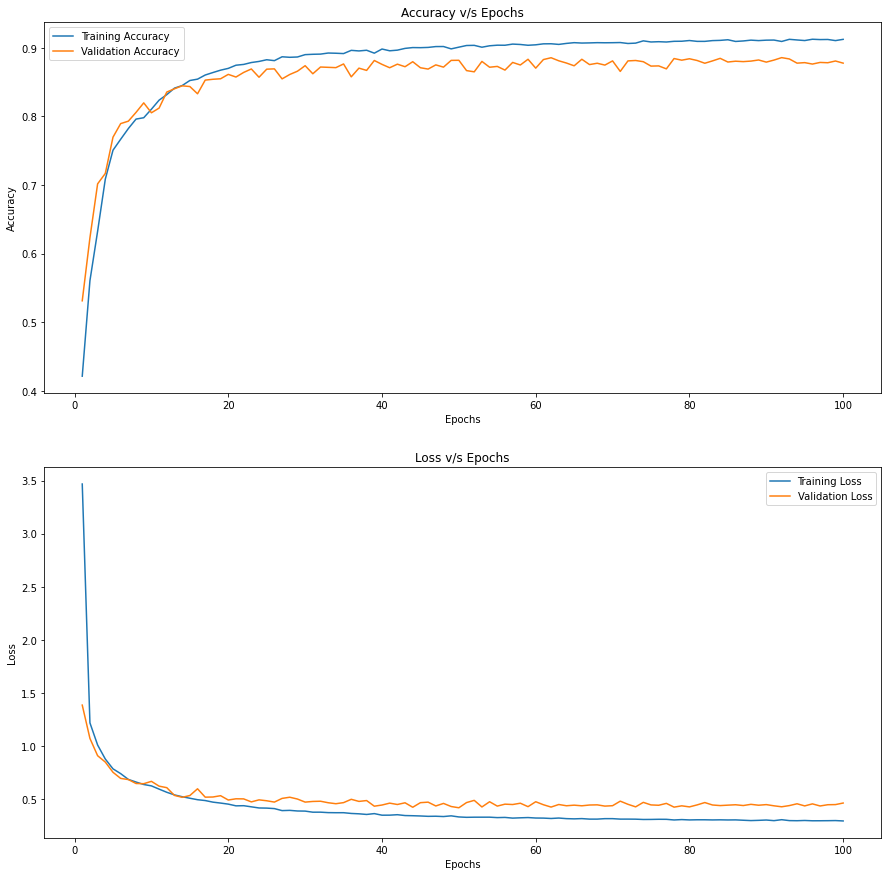

In [44]:
plot_accloss(eps,model_run4)

In [46]:
evaluation(classifier_glorot,X_val,y_val)

263/263 [==============================] - 1s 2ms/step - loss: 0.5058 - accuracy: 0.8756
loss =  0.50585
accuracy =  87.56


# HeNormal Weight Initialization
 * mean = 0
 * stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.

In [47]:
classifier_he = Sequential()

In [48]:
initializer = tf.keras.initializers.HeNormal()
classifier_he.add(Dense(16,activation='relu',kernel_initializer=initializer))
classifier_he.add(Dense(16,activation='relu'))
classifier_he.add(Dense(10,activation='sigmoid'))

In [49]:
classifier_he.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [50]:
model_run5 = classifier_he.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_val,y_val))

Epoch 1/100
840/840 [==============================] - 3s 2ms/step - loss: 3.4036 - accuracy: 0.2589 - val_loss: 1.8183 - val_accuracy: 0.3219
Epoch 2/100
840/840 [==============================] - 2s 2ms/step - loss: 1.5867 - accuracy: 0.4363 - val_loss: 1.3470 - val_accuracy: 0.5134
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 1.2100 - accuracy: 0.5640 - val_loss: 1.0894 - val_accuracy: 0.6062
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 1.0189 - accuracy: 0.6269 - val_loss: 0.9541 - val_accuracy: 0.6466
Epoch 5/100
840/840 [==============================] - 2s 2ms/step - loss: 0.8931 - accuracy: 0.6685 - val_loss: 0.8173 - val_accuracy: 0.7070
Epoch 6/100
840/840 [==============================] - 2s 2ms/step - loss: 0.7747 - accuracy: 0.7148 - val_loss: 0.7313 - val_accuracy: 0.7272
Epoch 7/100
840/840 [==============================] - 2s 2ms/step - loss: 0.6850 - accuracy: 0.7539 - val_loss: 0.6768 - val_accuracy: 0.7815

Epoch 58/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2097 - accuracy: 0.9394 - val_loss: 0.3865 - val_accuracy: 0.9001
Epoch 59/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2052 - accuracy: 0.9403 - val_loss: 0.3512 - val_accuracy: 0.9153
Epoch 60/100
840/840 [==============================] - 2s 2ms/step - loss: 0.1995 - accuracy: 0.9418 - val_loss: 0.3379 - val_accuracy: 0.9195
Epoch 61/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2043 - accuracy: 0.9416 - val_loss: 0.3323 - val_accuracy: 0.9171
Epoch 62/100
840/840 [==============================] - 2s 2ms/step - loss: 0.1992 - accuracy: 0.9427 - val_loss: 0.3468 - val_accuracy: 0.9159
Epoch 63/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2050 - accuracy: 0.9422 - val_loss: 0.3568 - val_accuracy: 0.9174
Epoch 64/100
840/840 [==============================] - 2s 3ms/step - loss: 0.1985 - accuracy: 0.9432 - val_loss: 0.3563 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

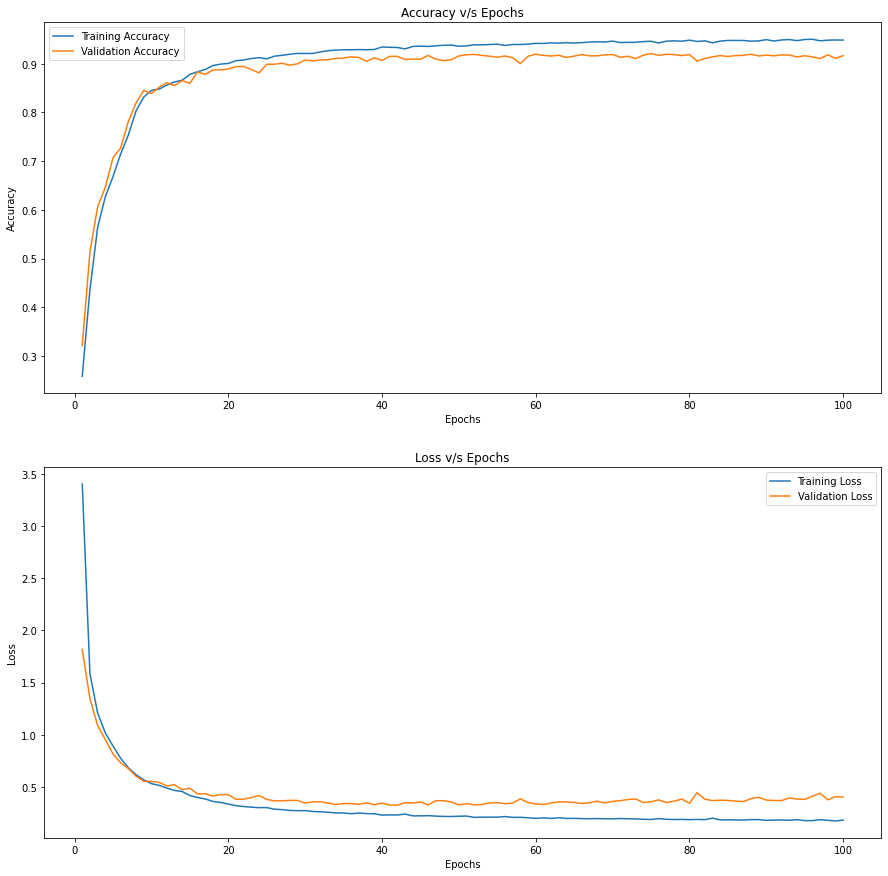

In [51]:
plot_accloss(eps,model_run5)

In [52]:
evaluation(classifier_he,X_val,y_val)

263/263 [==============================] - 1s 2ms/step - loss: 0.4272 - accuracy: 0.9115
loss =  0.42715
accuracy =  91.15


# LeCunNormal Weight Intialization
* mean = 0
* stddev = sqrt(1 / fan_in) where fan_in is the number of input units in the weight tensor.

In [53]:
classifier_lecun = Sequential()

In [54]:
initializer = tf.keras.initializers.LecunNormal()
classifier_lecun.add(Dense(16,activation='relu',kernel_initializer=initializer))
classifier_lecun.add(Dense(16,activation='relu'))
classifier_lecun.add(Dense(10,activation='sigmoid'))

In [55]:
classifier_lecun.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [56]:
model_run6 = classifier_lecun.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_val,y_val))

Epoch 1/100
840/840 [==============================] - 3s 2ms/step - loss: 2.0318 - accuracy: 0.4622 - val_loss: 1.1096 - val_accuracy: 0.6769
Epoch 2/100
840/840 [==============================] - 2s 2ms/step - loss: 0.9699 - accuracy: 0.7048 - val_loss: 0.8324 - val_accuracy: 0.7445
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7694 - accuracy: 0.7768 - val_loss: 0.7124 - val_accuracy: 0.7969
Epoch 4/100
840/840 [==============================] - 2s 2ms/step - loss: 0.6650 - accuracy: 0.8106 - val_loss: 0.6195 - val_accuracy: 0.8311
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 0.5727 - accuracy: 0.8387 - val_loss: 0.5722 - val_accuracy: 0.8411
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 0.5315 - accuracy: 0.8450 - val_loss: 0.5681 - val_accuracy: 0.8390
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 0.4905 - accuracy: 0.8567 - val_loss: 0.4979 - val_accuracy: 0.8637

Epoch 58/100
840/840 [==============================] - 1s 2ms/step - loss: 0.2575 - accuracy: 0.9234 - val_loss: 0.3917 - val_accuracy: 0.8952
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 0.2523 - accuracy: 0.9248 - val_loss: 0.3835 - val_accuracy: 0.8967
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 0.2531 - accuracy: 0.9252 - val_loss: 0.4047 - val_accuracy: 0.8920
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 0.2555 - accuracy: 0.9243 - val_loss: 0.3819 - val_accuracy: 0.8954
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 0.2545 - accuracy: 0.9244 - val_loss: 0.4162 - val_accuracy: 0.8894
Epoch 63/100
840/840 [==============================] - 1s 2ms/step - loss: 0.2553 - accuracy: 0.9237 - val_loss: 0.3987 - val_accuracy: 0.8902
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.9260 - val_loss: 0.4083 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

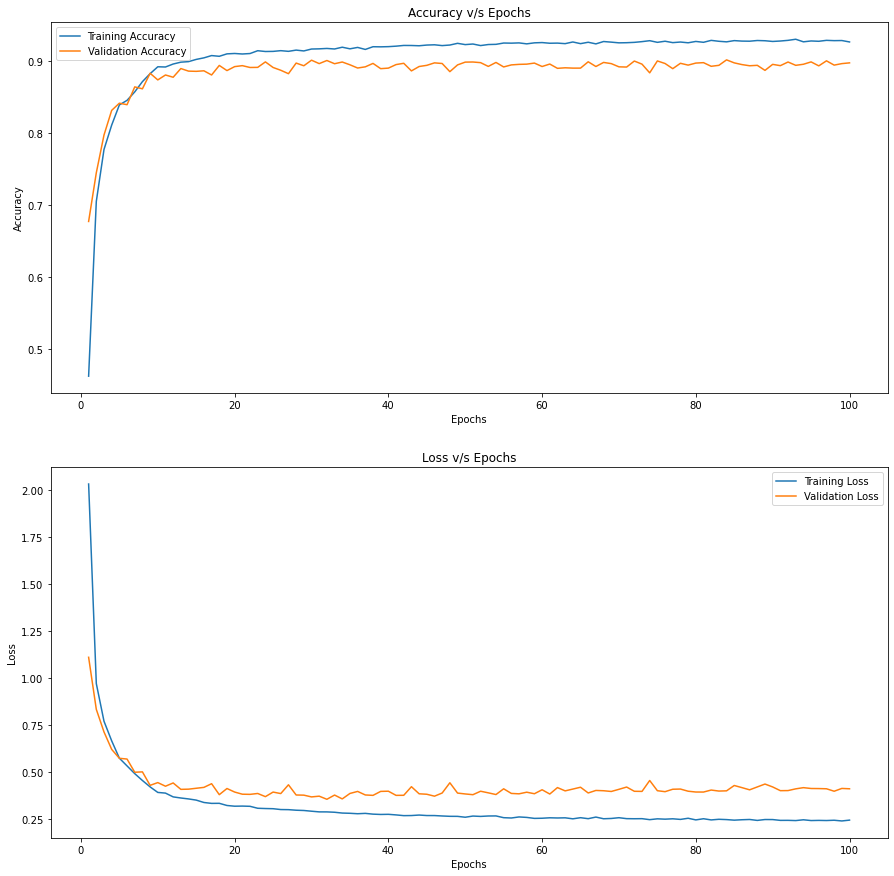

In [57]:
plot_accloss(eps,model_run6)

In [58]:
evaluation(classifier_lecun,X_val,y_val)

263/263 [==============================] - 1s 2ms/step - loss: 0.4155 - accuracy: 0.8944
loss =  0.41547
accuracy =  89.44


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

Text(0, 0.5, 'Accuracy')

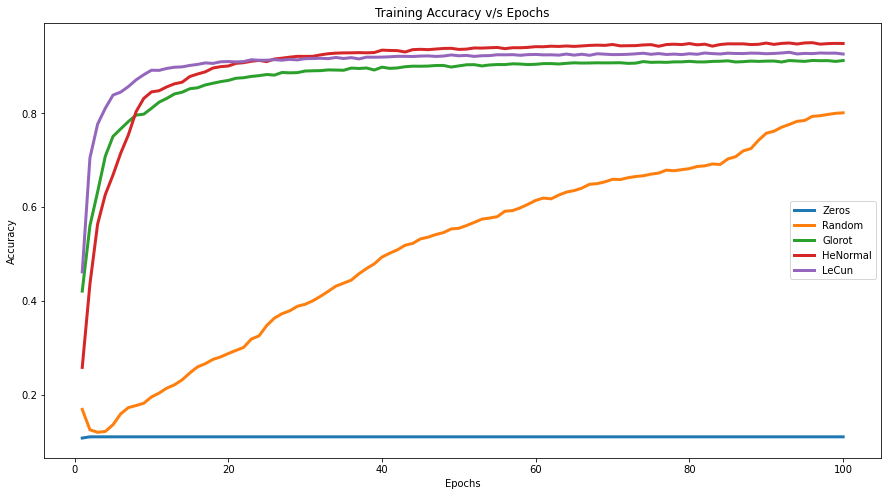

In [62]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_accuracy2 = model_run2.history['accuracy']
train_accuracy3 = model_run3.history['accuracy']
train_accuracy4 = model_run4.history['accuracy']
train_accuracy5 = model_run5.history['accuracy']
train_accuracy6 = model_run6.history['accuracy']
sns.lineplot(epochs, train_accuracy2, label ='Zeros',linewidth=3)
sns.lineplot(epochs, train_accuracy3, label ='Random',linewidth=3)
sns.lineplot(epochs, train_accuracy4, label ='Glorot',linewidth=3)
sns.lineplot(epochs, train_accuracy5, label ='HeNormal',linewidth=3)
sns.lineplot(epochs, train_accuracy6, label ='LeCun',linewidth=3)
plt.title('Training Accuracy v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

Text(0, 0.5, 'loss')

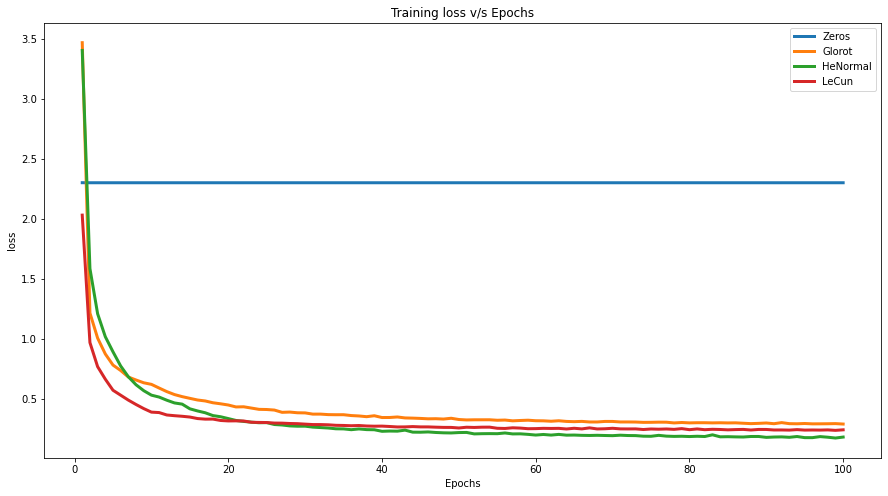

In [68]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_loss2 = model_run2.history['loss']
train_loss3 = model_run3.history['loss']
train_loss4 = model_run4.history['loss']
train_loss5 = model_run5.history['loss']
train_loss6 = model_run6.history['loss']
sns.lineplot(epochs, train_loss2, label ='Zeros',linewidth=3)
#sns.lineplot(epochs, train_loss3, label ='Random',linewidth=3)
sns.lineplot(epochs, train_loss4, label ='Glorot',linewidth=3)
sns.lineplot(epochs, train_loss5, label ='HeNormal',linewidth=3)
sns.lineplot(epochs, train_loss6, label ='LeCun',linewidth=3)
plt.title('Training loss v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')